# LHC Page1
<hr style="border-top-width: 4px; border-top-color: #34609b;">

Extract live data from the [LHC](http://home.cern/topics/large-hadron-collider) and create interactive plots with [PyTimber](https://gitlab.cern.ch/acc-logging-team/nxcals/-/tree/develop/python/pytimber).

## Preparation
Let's import all the Python modules necessary for this study and tell matplotlib to generate interactive javascript plots.

In [7]:
# Enable an interactive mode for Matplotlib plots
%matplotlib notebook

from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pytz
import time
import pytimber

We now open the connection to the database:

In [2]:
db = pytimber.LoggingDB(spark_session=spark)

## Retrieve the data from the logging database
We are now ready to open a connection to the logging database and extract for the past 24 hours:
- The beams' intensities
- The beam energy

In [14]:
now = time.time()
now_minus_a_day = now - 3600 * 24

t1 = "2016-06-23 00:00:00"
t2 = "2016-06-26 00:00:00"

# Uncomment for the recent data
# t1 = now_minus_a_day
# t2 = now

ib1 = "LHC.BCTDC.A6R4.B1:BEAM_INTENSITY"
ib2 = "LHC.BCTDC.A6R4.B2:BEAM_INTENSITY"
nrg = "LHC.BOFSU:OFSU_ENERGY"
data = db.get([ib1, ib2, nrg], t1, t2)

## Plotting the data
We can now build a plot of the intensity and beams energy starting from the data we retrieved. The [matplotlib](https://matplotlib.org) library can be used for creating interactive javascript based data visualisations.

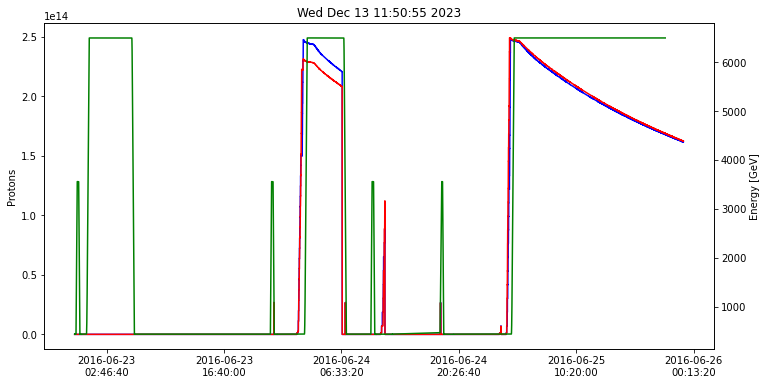

In [15]:
def dumpdate(t=None, fmt="%Y-%m-%d %H:%M:%S.SSS"):
    utc_dt = datetime.utcfromtimestamp(t)
    tz = pytz.timezone("Europe/Zurich")
    tz_dt = utc_dt.astimezone(tz)
    return tz_dt.strftime(fmt)

class rdmDateFormatter(ticker.Formatter):
    def __call__(self, x, pos=None):
        return dumpdate(x, fmt="%Y-%m-%d\n%H:%M:%S")
    
plt.figure(figsize=(12, 6))

tt, vv = data[ib1]
plt.plot(tt, vv, '-b', label='Beam1')
tt, vv = data[ib2]
plt.plot(tt, vv, '-r', label='Beam2')
plt.ylabel('Protons')
plt.twinx()
if nrg in data:
    tt, vv = data[nrg]
    plt.plot(tt, vv, '-g', label='Energy')
plt.ylabel('Energy [GeV]')
plt.title(time.asctime(time.localtime(now)))

# set xaxis date
ax = plt.gca()
ax.xaxis.set_major_formatter(rdmDateFormatter())
ax.xaxis.major.locator._nbins = 6
plt.draw()


## Further analysis
In this section we show how to search for the available variables such as the luminosity of experiments and the tree of the variables.

In [7]:
print("Experiments' instantaneous luminosity variable names")
db.search_variables("%LUMI_INST")

Experiments' instantaneous luminosity variable names


['ATLAS.OFFLINE:BUNCH_LUMI_INST',
 'ATLAS:BUNCH_LUMI_INST',
 'ALICE:BUNCH_LUMI_INST',
 'CMS.OFFLINE:BUNCH_LUMI_INST',
 'CMS:BUNCH_LUMI_INST',
 'LHCB:BUNCH_LUMI_INST',
 'LHCB.OFFLINE:BUNCH_LUMI_INST',
 'ALICE.OFFLINE:BUNCH_LUMI_INST']

In [48]:
print("Exploration of the variables' tree")
db.get_variables_for_hierarchies("/LHC/Beam_Instrumentation/Beam_Position/DOROS_BPMs/P1")

Exploration of the variables' tree


{'/LHC/Beam Instrumentation/Beam Position/DOROS BPMs/P1': ['LHC.BPM.1L1.B1_DOROS:ACQ_STATUS',
  'LHC.BPM.2R1.B2_DOROS:RAW_V1',
  'LHC.BPM.1R1.B2_DOROS:RAW_H2',
  'LHC.BPM.1R1.B2_B_DOROS:raw_V1',
  'LHC.BPM.1R1.B1_DOROS:ACQ_STATUS',
  'LHC.BPM.2L1.B2_DOROS:POS_H',
  'LHC.BPM.7L1.B1_DOROS:HORPOSSPREAD',
  'LHC.BPM.2R1.B1_DOROS:POS_H',
  'LHC.BPM.1R1.B2_DOROS:POS_H',
  'LHC.BPM.A6R1.B1_DOROS:POS_V',
  'LHC.BPM.2R1.B2_DOROS:RAW_H1',
  'LHC.BPM.A6R1.B1_DOROS:RAW_V1',
  'LHC.BPM.7R1.B2_DOROS:RAW_H1',
  'LHC.BPM.7R1.B2_DOROS:RAW_V1',
  'LHC.BPM.1R1.B2_DOROS:RAW_V2',
  'LHC.BPM.1R1.B1_B_DOROS:pos_V',
  'LHC.BPM.1L1.B1_DOROS:POS_H',
  'LHC.BPM.A6R1.B1_DOROS:RAW_H1',
  'LHC.BPM.7L1.B2_DOROS:VERPOSSPREAD',
  'LHC.BPM.A6L1.B2_DOROS:ACQ_STATUS',
  'LHC.BPM.1L1.B2_B_DOROS:pos_V',
  'LHC.BPM.1R1.B1_B_DOROS:raw_H1',
  'LHC.BPM.7L1.B2_DOROS:RAW_V1',
  'LHC.BPM.1L1.B2_B_DOROS:acq_status',
  'LHC.BPM.7R1.B2_DOROS:POS_H',
  'LHC.BPM.1R1.B2_DOROS:POS_V',
  'LHC.BPM.2L1.B2_DOROS:ACQ_STATUS',
  'LHC.BPM.1L1.